In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import shutil

In [2]:
normal_images_path = './dataset/normal/'
cropped_images_path = './dataset/cropped/'

### Face Detection (with two eyes)

In [3]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [4]:
# function to return the array of images having only face
def get_cropped_image(path: str):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.25, 6)
    faces_images = []
    for (x, y, w, h) in faces:
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            faces_images.append(roi_color)
    if len(faces_images) != 0:
        return faces_images
    return None

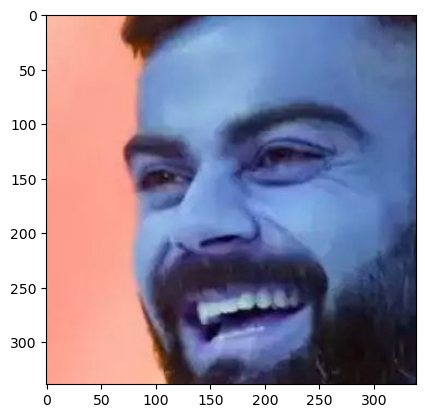

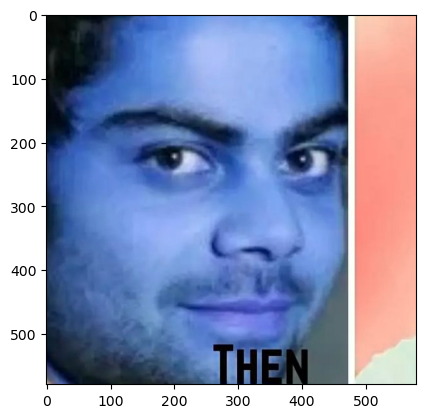

In [5]:
imgs = get_cropped_image('./dataset/normal/virat_kohli/7fa5f2d27b.jpg')
for im in imgs:
    plt.figure()
    plt.imshow(im)

In [6]:
# get the path to all dirs in dataset
def get_img_dirs():
    img_dirs = []
    for obj in os.scandir(normal_images_path):
        if obj.is_dir():
            img_dirs.append(obj.path)
    return img_dirs

In [7]:
# remove cropped directory and create agaib
def make_cropped_dir():
    if os.path.exists(cropped_images_path):
        shutil.rmtree(cropped_images_path)
    os.mkdir(cropped_images_path)

In [8]:
def get_cropped_dataset(dataset_path: str):
    make_cropped_dir()
    img_dirs = get_img_dirs()
    data_dict = {}
    for img_dir in img_dirs:
        dir_name = img_dir.split('/')[-1]
        data_dict[dir_name] = []
        count = 1
        for obj in os.scandir(img_dir):
            cropped_imgs = get_cropped_image(obj.path)
            if cropped_imgs is not None:
                for cropped_img in cropped_imgs:
                    class_dir_path = dataset_path + dir_name
                    if not os.path.exists(class_dir_path):
                        os.mkdir(class_dir_path)
                        print('Generating cropped images in directory: ', class_dir_path)
                    cropped_img_name = dir_name + '_' + str(count) + '.jpg'
                    cropped_img_path = class_dir_path + '/' + cropped_img_name

                    cv2.imwrite(cropped_img_path, cropped_img)
                    data_dict[dir_name].append(cropped_img_path)
                    count += 1
    return data_dict

In [9]:
data_dict = get_cropped_dataset(cropped_images_path)

Generating cropped images in directory:  ./dataset/cropped/yuzvendra_chahal
Generating cropped images in directory:  ./dataset/cropped/rohit_sharma
Generating cropped images in directory:  ./dataset/cropped/k_l_rahul
Generating cropped images in directory:  ./dataset/cropped/dinesh_karthik
Generating cropped images in directory:  ./dataset/cropped/virat_kohli
Generating cropped images in directory:  ./dataset/cropped/kedar_jadhav
Generating cropped images in directory:  ./dataset/cropped/kuldeep_yadav
Generating cropped images in directory:  ./dataset/cropped/shikhar_dhawan
Generating cropped images in directory:  ./dataset/cropped/jasprit_bumrah
Generating cropped images in directory:  ./dataset/cropped/ms_dhoni
Generating cropped images in directory:  ./dataset/cropped/mohammed_shami
Generating cropped images in directory:  ./dataset/cropped/bhuvneshwar_kumar
Generating cropped images in directory:  ./dataset/cropped/ravindra_jadeja
Generating cropped images in directory:  ./dataset/